<h1><center>Ajustement de Valorisation IPV et modèle de Black-Scholes</center></h1>


# Introduction

Le but de ce travail est d'impliciter la volatilité du sous jacent dans le modèle de Black Scholes et de faire un Ajustement de Valorisation à Valeur Principale d'un call *(le prix que nous donne le pricer)* pour s'approcher de la **Juste Valeur**.

$$\text{Juste Valeur}=\text{Valorisation Principale}+\text{Ajustement de Valorisation (IPV)}$$

Soit $C(\sigma)$ le prix fourni par le pricer d'un call européen de sous jacent une action $A$ dont le prix est $S_0$ à l'émission du contrat, de strike $K=100$ et de maturité $T=1$ an et $C_m$ le prix consensus d'un call avec les mêmes caractéristiques founi par Totem.

On définit la fonction $f$ comme suit :

$$f(\sigma)=C(\sigma)-C_m$$

L'objectif est alors de trouver $\sigma '$ telle que 

$$f(\sigma ')=C(\sigma ')-C_m=0$$

Pour faire notre premiere éstimation du prix de ce call nous avons utilisé une volatilité historique $\sigma_h=0.3$

Pour trouver $\sigma '$ nous allons utiliser l'algorithme de Newton Raphson

# Modèle de Black and Scholes et Ajustement de Valorisation

## Modèle de black scholes 

On peut montrer que la furmule du prix d'un call peut s'écrire de la manière suivante :

$$C(\sigma)=S_0N(d_1)-Ke^{-rT}N(d_2)$$

Où

$$\begin{cases}
      r= 5\text{% : taux d'actualisation} & \\
      \sigma \text{ : la volatilité} & \\
      N \text{: la fonction de répartition de la loi normale}
    \end{cases}$$

Et

$$d_1=\frac{log\left(\frac{S_0}{K}\right)+\left(r+\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}} \text{ et } d_2=d_1-\sigma\sqrt{T}$$



In [2]:
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt

In [16]:

T=1
S_0=100
r=0.05
sigma_h=0.3
K=100


C_m=10

def d1(x):
    return (1/(x*np.sqrt(T)))*(np.log(S_0/K)+(r+0.5*x**2)*T)


def d2(x):
    return d1(x)-x*np.sqrt(T)



def call_ferme(x):
    return S_0*norm.cdf(d1(x))-K*np.exp(-r*T)*norm.cdf(d2(x))

call_ferme(sigma_h)


14.231254785985819

On va chercher alors la racine de la fonction $f$. Pour faire cela nous allons utiliser l'algorithme de Newton Raphson.

------------------------------------------------------------------

**Définiton :**

On utilise l'algorithme de Newton Raphson pour trouver la racine d'une fonction $f$ et est définit itérativement de la manière suivante
 $$\begin{cases}
      x_0=v & \\
      x_{n+1}=x_{n}-\frac{f(x_n)}{f'(x_n)} & 
    \end{cases}$$
    
    
-----------------------------------------------------------------


On a

$$f(\sigma)=C(\sigma)-C_m=S_0N(d_1)-Ke^{-rT}N(d_2)-C_m$$

Et on peut monter que 

$$\frac{\partial f(\sigma)}{\partial \sigma}=\frac{\partial C(\sigma)}{\partial \sigma}=S_0\sqrt{T}N'(d1)$$

Où
$$N'(x)=\frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}$$



In [5]:
def f(x):
    return call_ferme(x)-C_m

    

def dN(x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)


def df(x):
    return S_0*np.sqrt(T)*dN(d1(x))



def newton_raphson(x_0,conf,max_iter,g,dg):
    x_n=x_0
    for i in range(max_iter):
        x_n_plus_1= x_n-g(x_n)/dg(x_n)
        
        if abs(x_n_plus_1-x_n)<conf:
            return x_n_plus_1
        x_n=x_n_plus_1
    print("solution non trouvé")
    
    
sigma_prim=newton_raphson(1,conf=10**-9,max_iter=10000000,g=f,dg=df)

sigma_prim

0.1879716494569099

# Calcul de l'Ajusttement de Valorisation

## définition de l'IPV

La **vérification indépendante des prix** est un processus de plus en plus important pour soutenir les fonctions financières et de risque dans un large éventail d'institutions financières. Le processus de base de la IPV exige que les prix internes soient vérifiés par rapport à des sources tierces indépendantes.

Le Prudent Valuation Guidance de Bâle II définit la Vérification Indépendante des Prix comme "le processus par lequel les prix du marché ou les données d'entrée des modèles sont régulièrement vérifiés pour s'assurer de leur exactitude". La vérification des prix du marché ou des données du modèle doit être effectuée par une unité indépendante de la salle des marchés, au moins une fois par mois (ou, selon la nature du marché/de l'activité de négociation, plus fréquemment)".

## Application numérique

### Sensibilité

Le Vega est un type de grecque qui est utilisé pour calculer la sensibilité ou le taux de variation de la valeur d'un contrat d'option par rapport à la volatilité de l'actif sous-jacent. Le Vega est désigné par la lettre $V$. Essentiellement, le vega est la dérivée partielle première de la valeur du contrat d'option par rapport à la volatilité de l'actif sous-jacent.

$$V=\frac{\partial C(\sigma)}{\partial \sigma}(\sigma_h)=S_0\sqrt{T}N'(d1)$$

Où
$$N'(x)=\frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}$$

In [6]:

sensi=S_0*np.sqrt(T)*dN(d1(sigma_h))

sensi

37.94329331169453

**Remarque :**

En pratique on utilise plutot la formule suivante pour calculer la senbilité:

$$sensi_{bis}=\frac{\partial C(\sigma)}{\partial \sigma}(\sigma_h)=\lim\limits_{\delta \sigma \rightarrow + 0}\frac{C(\sigma_h + \delta \sigma)-C(\sigma_h)}{\delta \sigma}=\frac{C(\sigma_h + 1BP)-C(\sigma_h)}{1BP}$$

In [7]:
sensi_bis=(call_ferme(sigma_h+0.0001)-call_ferme(sigma_h))/0.0001

sensi_bis

37.94332661342992

### IPV ( sensi choc )
----------------

**Définitions :**

* Dans notre contexte, la **choc** est définie comme suit :
$$\text{choc}=\sigma '-\sigma_h$$

* Et on définit l'IPV comme suit :
$$IPV=\text{choc} . sensi = (\sigma '-\sigma_h).sensi$$

---------------

In [8]:
IPV=(sigma_prim-sigma_h)*sensi

IPV

-4.250724563881801

In [18]:
IPV_bis=(sigma_prim-sigma_h)*sensi_bis

IPV_bis

-4.250728294620287

# Ajustement de valorisation

Finalement, On calcule le proxy de la **Juste Valeur** comme suit :

$$\text{Juste Valeur}=\text{Valorisation principale}+\text{Ajustement de valorisation (IPV)}$$

In [10]:
fair_value=call_ferme(sigma_h)+IPV

fair_value

9.980530222104019

-----------------

**Remarque 1:**
On retombe bien sur une valeur proche du prix sur le marché.

--------------------

-------------------------

**Remarque 2:**

On a grace au développement de Taylor-Young au point $\sigma '$

$$C(\sigma ')\approx C(\sigma_h) +(\sigma '-\sigma_h)\partial_{\sigma}C(\sigma_h)$$

Donc

$$C_m\approx C(\sigma_h) +(\sigma '-\sigma_h).sensi$$

Donc 

$$C_m \approx \text{Juste Valeur}$$

----------------------------

# Conclusion

----------------------

**Définition :**

D'après La **norme IFRS 13**, la **"juste valeur"** (ou "fair value" en anglais) se définit comme *"le prix qui serait reçu pour la vente d'un actif ou payé pour le transfert d'un passif lors d'une transaction normale entre des participants de marché bien informés à la date d'évaluation"*.

-------------------
**Conclusion :**

D'après les remarques 1 et 2 on peut conclure que notre démarche nous permet de retrouver la Juste Valeur qui est approximativement la valeur sur le marché.

**************************

*************************

# Algorithme de Robbins Monro

soit $f$ une fonction continue telle qu'il existe $F$ une fonction et $U$ une variable aléatoire de loi connue telles que 

$$f(x)=\mathbb{E}[F(x,U)]$$

Le but de l'algorithme de Robbins Monro est de trouver, presque surement, $x'$ tel que 

$$f(x')=\mathbb{E}[F(x',U)]=0$$

-----------------
**Définition:**

Le théoreme de Robbins Monro stipule que si on définie itérativement une suite de variables aléatoires $(X_n)_{n\geq0}$:

$$\begin{cases}
      X_0= x_0 & \\
      X_{n+1}=X_n-\gamma_nF(X_n,U_{n+1}) & 
    \end{cases}$$
    
Où $(\gamma_n)_{n\geq0}$ une suite telle que $\sum_{n\geq0}\gamma_n<\infty$ et $(U_n)_{n\geq0}$ une suite de variables aléatoires idépendantes et identiquement distribuées selon la même loi que $U$.

Alors, 
$$X_n \text{ converge presque surement vers }x'$$

----------------





## Exemple d'application ( loi forte des grands nombres)

Soit $f(x)=x$  et $x'$ tel que $f(x')=x'=0$ et $G$ une gaussienne centrée réduite, donc $\mathbb{E}[G]=0$ et $Var[G]=1$.

On a alors avec $F(x,G)=x-G$

$$
f(x)=\mathbb{E}[F(x,G)]=\mathbb{E}[x-G]=x
$$

Soit $(G_n)_{n\geq0}$ une suite de gaussiennes centrées réduites indépendantes. La loi forte des grand nombre nous dit que 
$$
M_n=\frac{G_0+....+G_n}{n} \text{converge présque surement vers }\mathbb{E}[G]=0$$

On a avec $\gamma_n=\frac{1}{n+1}$

$$M_{n+1} = M_n -\gamma_n \left(M_n - G_{n+1}\right)= M_n -\gamma_n F \left(M_n , G_{n+1}\right)$$
En effet,

$$\begin{align*}
M_{n+1}-M_n&=\frac{n\sum_{i=1}^{n+1}G_i-(n+1)\sum_{i=1}^nG_i}{n(n+1)}&\\
&=\frac{G_{n+1}}{n+1}-\frac{M_n}{n+1}&\\
&=-\gamma_n(M_n-G_{n+1})
\end{align*}$$



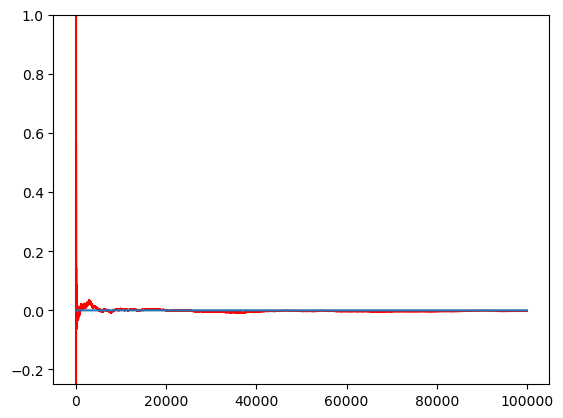

In [40]:

def algorithme_rm(x_0,n,F,G):
    X=np.zeros(n)
    X[0]=x_0
    for i in range(0,n-1):
        X[i+1]=X[i]-gamma(i)*F(X[i],G[i+1])
        
    return X


def F1(x,g):
        return x-g

 
x_0=1


G=np.random.normal(size=n)

X=algorithme_rm(x_0,n,F1,G)

plt.plot(X,'red')
plt.plot(np.zeros(n))
plt.ylim(-0.25,+1)
plt.show()

# Modèle de Black and Scholes et Ajustement de Valorisation stochastique

## Modèle de black scholes 

### Méthode Monte Carlo 
On suppose que le prix $S_t$ d'une action A suit la dynamique suivante:

$$dS_t=S_t\left(rdt+\sigma dB_t\right)$$

Où

$$\begin{cases}
      r= 5\text{% : taux d'actualisation} & \\
      \sigma \text{ : la volatilité} & \\
      B_t \text{ : Un mouvement brownien standard, } B_t \sim \mathcal{N}(0,\,t) &
    \end{cases}$$

la solution de cette EDS est la diffusion suivante $\forall t\geq 0$ et $\sigma \in [0,1]$:

$$S_t(\sigma)=S_0exp\left\{(r-\frac{\sigma^2}{2})t+\sigma B_t\right\}=S_0exp\left\{(r-\frac{\sigma^2}{2})t+\sigma \sqrt{t} G\right\}$$

On définit alors le prix d'un call europeen dont le sous jacent est A de la maniere suivante:

$$C(\sigma)=\mathbb{E}\left[e^{-rT}(S_T(\sigma)-K)_+\right]$$

In [11]:
n=100000


def payoff_actu(x,U):
    return np.exp(-r*T)*max(S_0*np.exp((r-0.5*x**2)*T+x*np.sqrt(T)*U)-K,0)

    
G=np.random.normal(size=n)



np.mean([payoff_actu(sigma_h,g) for g in G])

14.237602981299613

## Implicitation de la volatilité

**Remarque :**
Notre objectif est toujours de trouver $\sigma '$ telle que 

$$f(\sigma ')=C(\sigma ')-C_m=0$$

On suppose que le prix consensus que fournit totem est $C_m=10$



L'inconnu dans notre probleme est $\sigma$, on pose alors:

$$f(\sigma)=\mathbb{E}\left[e^{-rT}(S_T(\sigma)-K)_+\right]-C_m$$

Donc 
$$f(\sigma)=\mathbb{E}\left[F(\sigma,G)\right]$$
Avec 
$$F(\sigma,G)=e^{-rT}\left(S_0exp\left\{(r-\frac{\sigma^2}{2})T+\sigma \sqrt{T}G\right\}-K\right)_+-C_m$$
-----------------
**Remarque :**

Le but de cette partie est d'impliciter le paramètre $\sigma$ et ceci en trouvant $\sigma '$ qui annule la fonction $f$ en construisant la suite suivante :

$$\begin{cases}
      \sigma_0= x_0 & \\
      \sigma_{n+1}=\sigma_n-\gamma_nF(\sigma_n,G_{n+1}) & 
    \end{cases}$$

Où $(G_n)_{n\geq0}$ iid selon $\mathcal{N}(0,\,1)$ et  $\gamma_n=\frac{1}{n+1}$

--------------

On va en premier temps utiliser l'algorithme de Robbins Monro naïf

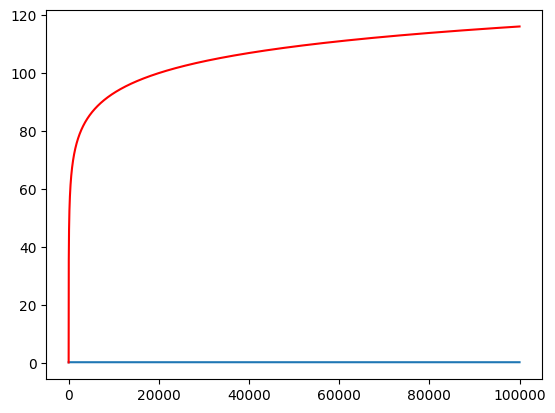

In [19]:


def gamma(n):
    return 1/(n+1)


def F_BS(x,U):
    return np.exp(-r*T)*max(S_0*np.exp((r-0.5*x**2)*T+x*np.sqrt(T)*U)-K,0)-C_m
    


G=np.random.normal(size=n)


X=algorithme_rm(0.1,n,F_BS,G)

plt.plot([sigma_prim for i in range(n)])
plt.plot(X,'red')
plt.show()

----------------
**Remarque :**

On remarque alors que l'algorithme ne converge pas

On implémente alors cet algorithme en ramenant à une valeur commune $=0$ lorsque  $\mid X_n \mid$ dépasse la valeur arbitraire 5 **(procédure dite de projection de Chen)**. On peut voir que l'algorithme converge

------------------

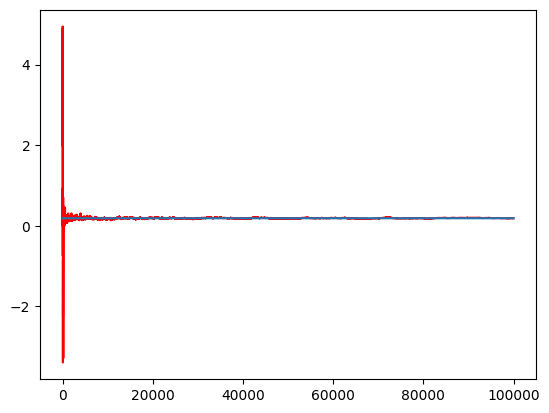

0.18646428623485828


In [15]:
MAX=5


def algorithme_rm_chen(x_0,MAX,n,F,G):
    X=np.zeros(n);
    X[0] = x_0;
    for i in range(n-1):
        X[i+1]=X[i]-gamma(i)*F(X[i],G[i+1])
        
        if(abs(X[i+1]) >= MAX): 
            
            X[i+1]=0
            
    return X

G=np.random.normal(size=n)

Y=algorithme_rm_chen(0.1,MAX,n,F_BS,G);

plt.plot(Y,'red');
plt.plot([sigma_prim for i in range(n)])
plt.show()

sigma_prim_bis=Y[-1]
print(sigma_prim_bis)